## Introduction to Deep Learning with PyTorch

This notebook will walk through the procedure of developing a neural network to solve a supervised learning problem with PyTorch. Let's begin with an example of a regression problem:

## Toy Example
The requirements are the following:

1. A dataset D = {$(x_1,y_1), (x_2,y_2), ..., (x_N, y_N)$}
2. A parametric model f with a specified model architecture (i.e. the functional form of f).
3. A loss function that evaluates the error in the outputs (predictions) of the model with respect to the ground truth labels y from the dataset D

In [1]:
%reload_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### Dataset
Let's collect a dataset of x,y samples where: $$y = 3x^2 + x - 2$$

$$X = [x_1, x_2, x_3, ..., x_N]^T$$
$$Y = [y_1, y_2, y_3, ..., y_N]^T$$

1. $x_i$ is a real value, so X has dimensions Nx1
2. $y_i$ is a real value, so Y has dimensions Nx1

In [2]:
x = torch.linspace(start=-1, end=1, steps=10000).unsqueeze(
    1
)  # 10000 equally spaced values between [-1, 1]
y = 3 * x**2 + x - 2

print(x.shape, y.shape)

torch.Size([10000, 1]) torch.Size([10000, 1])


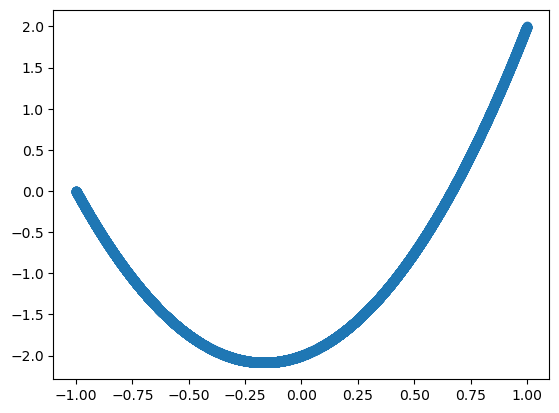

In [3]:
# visualize the dataset
plt.scatter(x, y)

### Model
Let's define the model (i.e. the function f) that will map x to y. We assume that we do not know that y is a quadratic function of x. All we will assume is that x and y have a highly nonlinear relationship. Then, what should this function f be? A neural network, specifically a Multi-Layer Perceptron!

**Multi-Layer Perceptron (MLP)**

MLP is a generic yet useful neural network model. Consider a MLP for regression task, where we want to learn a mapping $x \in \mathbb{R}^k \mapsto y \in \mathbb{R}$. The input $x$ is $k$-dimensional and $y$ is scalar. The simplest regression model is linear model with parameter $w \in \mathbb{R}^k$ and $w_0 \in \mathbb{R}$, we can propose to predict $y$ as $y_{pred} = w^T x + w_0$.

MLP is a generalization of linear regression. Consider a linear transformation by matrix $W_1\in\mathbb{R}^{k\times l}$ and bias vector $b_1\in \mathbb{R}^l$:

$$h_1 = x * W_1 + b_1$$

In addition to linear transformation, apply a non-linear function $\sigma(\cdot)$ elementwise to the above hidden vector $h_1$

$$z_1 = \sigma (h_1) $$

We have essentially generated a set of features $z_1$ from $x$. This set of features can be used as input to another linear model to predict $y$. Let us specify another set of parameter $W_2 \in \mathbb{R}^l, b_2 \in \mathbb{R}$. The prediction is:

$$y_{pred} = z_1 * W_2 + b_2$$

A input-output mapping from $x$ to $y_{pred}$ can be compactly written as below:

$$y_{pred} = \sigma(x * W_1 + b_1) * W_2 + b_2$$

We have just defined a simplest MLP. In simple words, MLP is defined by alternately stacking linear mappings ($W_1,b_1$) and nonlinear function ($\sigma(\cdot)$). Now, instead of having parameter $w,w_0$ in linear model, we have parameters $W_1,b_1,W_2,b_2$ in our simple MLP. Though this inevitably introduces more parameters, the model becomes more expressive and powerful as well.

We can define our model as: $$ f(x) = y_{pred} =  \sigma(x * W_1 + b_1) * W_2 + b_2$$

1. $x$ has dimension Nx1
2. $W_1$ has dimension 1x100
3. $b_1$ has dimension 1x1
4. $W_2$ has dimension 100x1
5. $b_2$ has dimension 1x1

In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 100), torch.nn.ReLU(), torch.nn.Linear(100, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

y_hat = model(x)

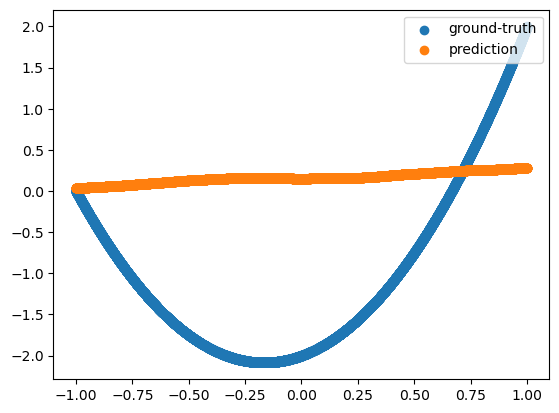

In [5]:
# visualize initial model predictions
plt.scatter(x, y, label="ground-truth")
plt.scatter(x, y_hat.detach(), label="prediction")
plt.legend(loc="upper right")
plt.show()

### Loss
For training, we need a loss function that will evaluate the quality of model predictions against ground truth labels y.

Let's use $L(\hat{y}, y) = (\hat{y}-y)^2$.

In [6]:
L = torch.mean(((y_hat - y) ** 2))
print(
    "The average loss or error in the model's predictions compared to the ground truth is %.4f"
    % (L)
)

The average loss or error in the model's predictions compared to the ground truth is 2.4169


### Optimization  (training)
Now we will optimize our model f until the loss is below a threshold. We have already discussed the general recipe at the very beginning of this tutorial.

In [7]:
alpha = 0.001
error_tolerance = 0.01

In [8]:
while L > error_tolerance:
    # forward pass
    y_hat = model(x)
    L = torch.mean((y_hat - y) ** 2)

    print(L.item())

    # backward pass
    optimizer.zero_grad()
    L.backward()

    # update parameters
    optimizer.step()

2.4168620109558105
2.33691143989563
2.259512424468994
2.1846940517425537
2.112478017807007
2.042876958847046
1.9758994579315186
1.911552906036377
1.8498376607894897
1.7907458543777466
1.7342602014541626
1.6803535223007202
1.6289913654327393
1.5801318883895874
1.5337265729904175
1.4897226095199585
1.4480613470077515
1.4086803197860718
1.371510624885559
1.3364795446395874
1.3035087585449219
1.2725152969360352
1.243411898612976
1.2161080837249756
1.190510630607605
1.1665236949920654
1.1440507173538208
1.1229946613311768
1.1032592058181763
1.0847495794296265
1.0673727989196777
1.0510386228561401
1.035659909248352
1.0211533308029175
1.007439374923706
0.9944431781768799
0.9820946455001831
0.970328152179718
0.9590829014778137
0.9483035206794739
0.937939465045929
0.9279446005821228
0.9182780981063843
0.9089033007621765
0.899787962436676
0.8909038305282593
0.8822264671325684
0.8737349510192871
0.8654114007949829
0.8572407960891724
0.8492107391357422
0.8413107395172119
0.8335323929786682
0.82586

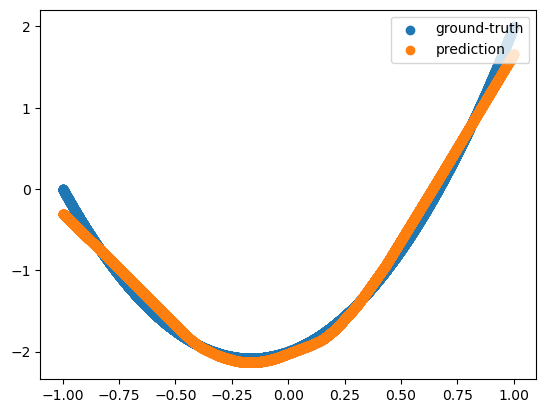

In [9]:
# visualize model predictions
plt.scatter(x, y, label="ground-truth")
plt.scatter(x, y_hat.detach(), label="prediction")
plt.legend(loc="upper right")
plt.show()

In [10]:
L = torch.mean(((y_hat - y) ** 2))
print(
    "The average loss or error in the model's predictions compared to the ground truth is %.4f"
    % (L)
)

The average loss or error in the model's predictions compared to the ground truth is 0.0100


## Harder Example

### Dataset
Let's collect a dataset of x,y samples where: $$y = sin(x) + \epsilon$$

$$X = [x_1, x_2, x_3, ..., x_N]^T$$
$$Y = [y_1, y_2, y_3, ..., y_N]^T$$

1. xi is a real value, so X has dimensions Nx1
2. yi is a real value, so Y has dimensions Nx1
3. $\epsilon \sim \mathcal{N}(0,1)$

In [11]:
x = torch.linspace(start=-10, end=10, steps=10_000).unsqueeze(
    1
)  # 10000 equally spaced values between [-10, 10]
y = torch.sin(x) + 0.2 * torch.normal(mean=torch.zeros_like(x), std=torch.ones_like(x))

print(x.shape, y.shape)

torch.Size([10000, 1]) torch.Size([10000, 1])


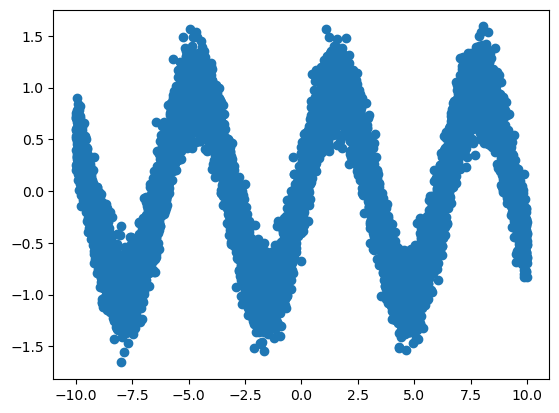

In [12]:
plt.scatter(x, y)
plt.show()

Let's also collect a test dataset that we will use to evaluate the model.

In [13]:
x_test = torch.linspace(start=-10, end=10, steps=5000).unsqueeze(1)
y_test = torch.sin(x_test)

Now it's your turn to define and train the model for this new dataset. You can copy code from the previous example.

**(In your submission, you need to submit a print or screenshot of cells after this cell only)**

### Model

In [14]:
def make_regressor(hidden_dim=20_000, depth=3):
    layers = []
    layers.append(nn.Linear(1, hidden_dim))
    layers.append(nn.Tanh())

    for _ in range(depth - 1):
        layers.append(nn.Linear(hidden_dim, hidden_dim))
        layers.append(nn.Tanh())

    layers.append(nn.Linear(hidden_dim, 1))  # final output, no activation
    return nn.Sequential(*layers)


# Example
model = make_regressor(hidden_dim=64, depth=3)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

y_hat = model(x)

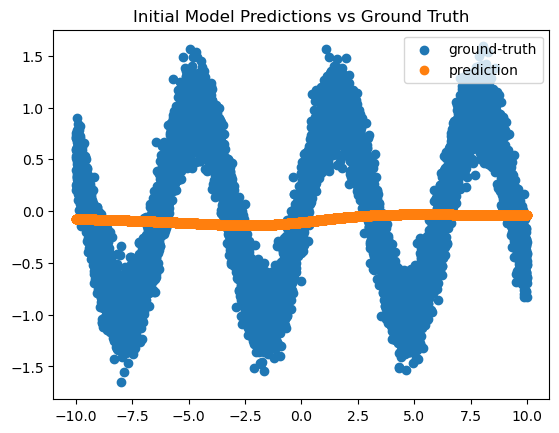

In [15]:
# visualize initial model predictions
plt.scatter(x, y, label="ground-truth")
plt.scatter(x, y_hat.detach(), label="prediction")
plt.legend(loc="upper right")
plt.title("Initial Model Predictions vs Ground Truth")
plt.show()

### Loss

In [16]:
L = torch.mean(((y_hat - y) ** 2))
print(
    "The average loss or error in the model's predictions compared to the ground truth is %.4f"
    % (L)
)

The average loss or error in the model's predictions compared to the ground truth is 0.5197


### Optimization
Finally, train the model!

In [17]:
alpha = 0.001  # unused
error_tolerance = 0.01

In [18]:
from kret_studies import *
from kret_studies.notebook import *
from kret_studies.complex import *

Loaded environment variables from /Users/Akseldkw/Desktop/Columbia/ORCS4529/.env.


In [19]:
out = uks_torch.train_regression(model, optimizer, x, y, target_loss=error_tolerance)

Epoch 000000 | Loss = 0.519740
Epoch 000001 | Loss = 0.509850
Epoch 000002 | Loss = 0.508818
Epoch 000003 | Loss = 0.502739
Epoch 000004 | Loss = 0.499967
Epoch 000005 | Loss = 0.500714
Epoch 000006 | Loss = 0.500024
Epoch 000007 | Loss = 0.496689
Epoch 000008 | Loss = 0.493008
Epoch 000009 | Loss = 0.490711
Epoch 000010 | Loss = 0.489298
Epoch 000020 | Loss = 0.464445
Epoch 000030 | Loss = 0.424200
Epoch 000040 | Loss = 0.358068
Epoch 000050 | Loss = 0.282815
Epoch 000060 | Loss = 0.264946
Epoch 000070 | Loss = 0.254269
Epoch 000080 | Loss = 0.243497
Epoch 000090 | Loss = 0.237195
Epoch 000100 | Loss = 0.231426
Epoch 000200 | Loss = 0.192781
Epoch 000300 | Loss = 0.172809
Epoch 000400 | Loss = 0.193442
Epoch 000500 | Loss = 0.110283
Epoch 000600 | Loss = 0.100464
Epoch 000700 | Loss = 0.084694
Epoch 000800 | Loss = 0.081950
Epoch 000900 | Loss = 0.069918
Epoch 001000 | Loss = 0.073605
Epoch 002000 | Loss = 0.046995
Epoch 003000 | Loss = 0.046457
Epoch 004000 | Loss = 0.041151
Epoch 00

In [20]:
out

TrainResult(best_loss=0.040796101093292236, epochs_run=6501, history=[0 values], stopped_reason='early_stopping_no_improvement')

In [35]:
y_hat_train = model(x)
y_hat = model(x_test)

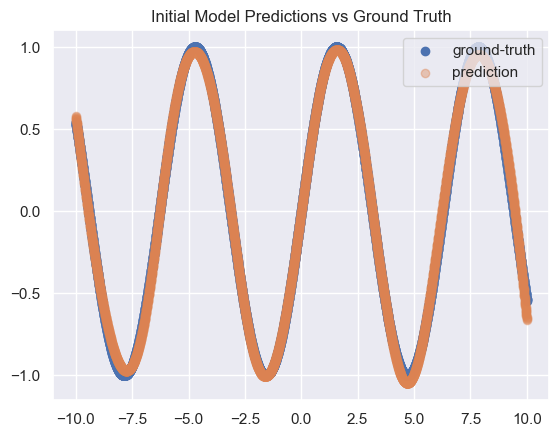

In [36]:
# visualize initial model predictions
plt.scatter(x_test, y_test, label="ground-truth")
plt.scatter(x_test, y_hat.detach(), label="prediction", alpha=0.4)
plt.legend(loc="upper right")
plt.title("Initial Model Predictions vs Ground Truth")
plt.show()

In [37]:
# DO NOT CHANGE

# given predictions y_hat from the test input x_test
print("test loss", ((y_test - y_hat) ** 2).mean().item())

test loss 0.0006549584213644266


## Conclusion
We have only scratched the surface of deep learning. Try changing the model architecture for better performance!

Both PyTorch and Tensorflow help us compute derivatives, which is what we ultimately need to incrementally improve the model through several forward and backward passes.

Please check out more information about the different APIs here:

PyTorch: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

Tensorflow 2: https://www.tensorflow.org/tutorials/quickstart/advanced